In [2]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adadelta
from keras.callbacks import EarlyStopping
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoding dimension
encoding_dim = 48  # Increased encoding dimension for more representation capacity

# Define the input placeholder
input_img = Input(shape=(784,))

# Add layers to the autoencoder
encoded = Dense(128, activation='relu')(input_img)  # New hidden layer with 128 units
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Original encoding layer

decoded = Dense(128, activation='relu')(encoded)  # New hidden layer with 128 units for decoding
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder model with the original optimizer
autoencoder.compile(optimizer=Adadelta(), loss='binary_crossentropy')

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Added early stopping to prevent overfitting

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train,
                epochs=50,  # Increased number of epochs for potentially better training
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping])  # Added early stopping callback

# Predict the reconstructed test set
reconstructed_imgs = autoencoder.predict(x_test)

# Compute the Mean Squared Error (MSE) for each sample
mse = np.mean(np.power(x_test - reconstructed_imgs, 2), axis=1)

# Calculate the mean reconstruction error
mean_mse = np.mean(mse)

print(f'Mean Reconstruction Error (MSE) on test set: {mean_mse}')

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 9s 21ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 2/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 5/50
235/235 [==============================] - 4s 18ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 7/50
235/235 [==============================] - 5s 19ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 8/50
235/235 [==============================] - 5s 20ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/50
235/235 [==============================] - 6s 25ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 10/50
235/235 [=======

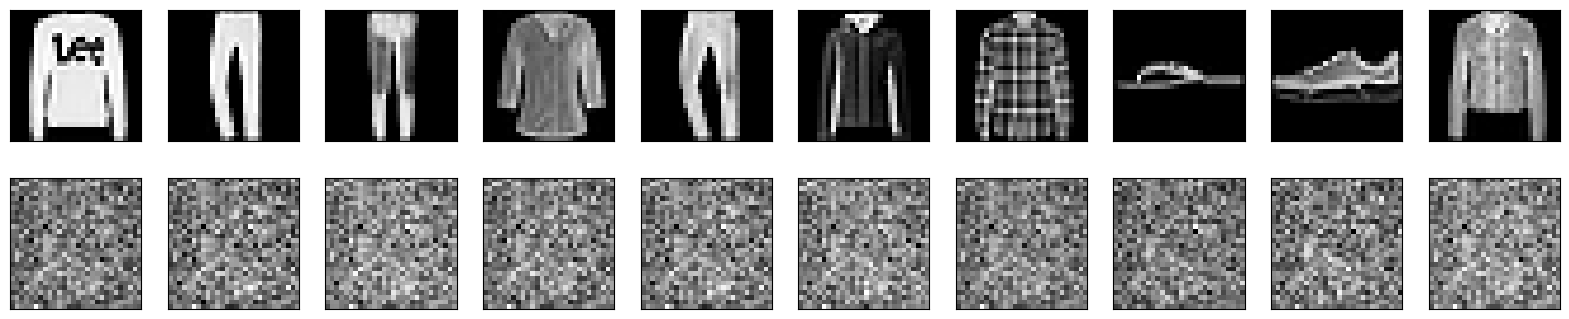

In [3]:
# Visualize one of the reconstructed version of the test data and the original test data
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

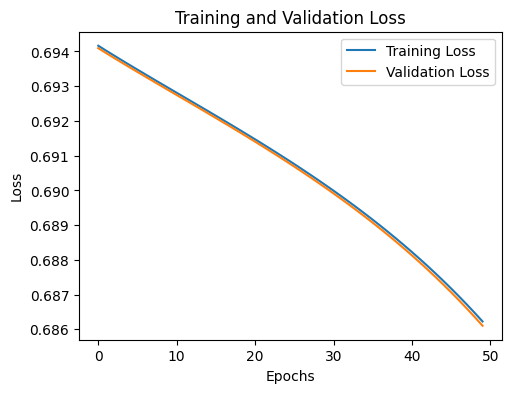

In [4]:
# Plot loss and accuracy using the history object
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6963 - val_loss: 0.6961
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 0.6960 - val_loss: 0.6959
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.6957 - val_loss: 0.6956
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 7/50
235/235 [==============================] - 4s 16ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 10/50
235/235 [==============================] - 2s 11ms/step - loss: 0.6941 - val_lo

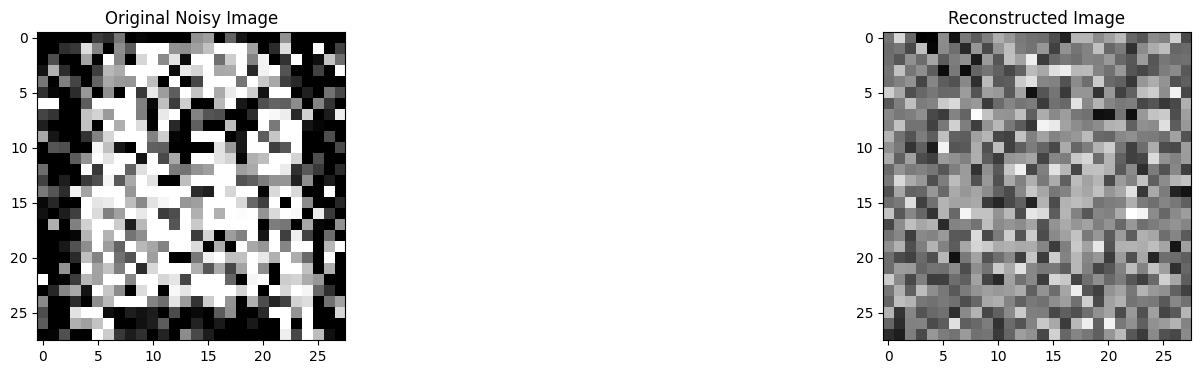

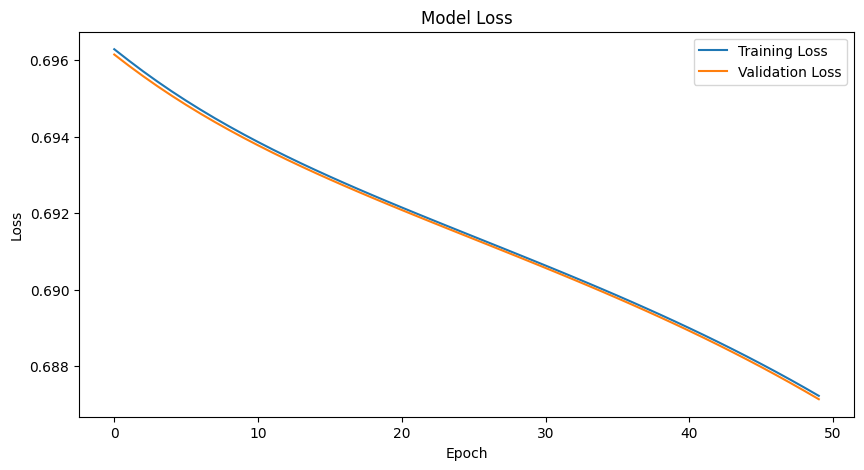

In [6]:
#### for denoising

from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict the reconstructed test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Compute the Mean Squared Error (MSE) for each sample
mse = np.mean(np.power(x_test - reconstructed_imgs, 2), axis=1)

# Calculate the mean reconstruction error
mean_mse = np.mean(mse)

print(f'Mean Reconstruction Error (MSE) on test set: {mean_mse}')

# Visualize the original noisy image and the reconstructed image
n = 1  # Index of the image to be visualized
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.title("Original Noisy Image")
plt.imshow(x_test_noisy[n].reshape(28, 28), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_imgs[n].reshape(28, 28), cmap="gray")
plt.show()

# Plotting training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()